In [1]:
import nltk
import math

In [2]:
import pandas as pd
import numpy as np
import collections
from nltk.corpus import stopwords
from datetime import datetime

In [3]:
df = pd.read_csv('data/amazon_NLP_data.csv' , encoding='utf-8-sig')

In [4]:
df['review'] = df['review'].str.replace("[^a-zA-Z ]","")
df['review'].replace('', np.nan, inplace=True)
df = df.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(df))

df['label'] = np.select([df.rating > 3], [1], default=0)


전처리 후 테스트용 샘플의 개수 : 877


In [5]:
def tagging(lines, tag):
    if tag == 'NOUN':
        is_noun = lambda pos: pos == 'NOUN' 
        
    elif tag == 'VERB':
        is_noun = lambda pos: pos == 'VERB'
        
    elif tag == 'ADJ':
        is_noun = lambda pos: pos == 'ADV' or pos == 'ADJ'
        
    elif tag == 'ALL':
        is_noun = lambda pos: pos == 'ADV' or pos == 'ADJ' or pos =='NOUN' or pos == 'VERB'
        
    else :
        raise Exception('inccorect TAG name')
    
    nouns = [word for (word, pos) in nltk.pos_tag(lines, tagset = 'universal') if is_noun(pos)]
    return nouns


In [6]:
def udf_list_lower(list):
    return [x.lower() for x in list]

In [7]:
df['tokenized'] = df['review'].apply(nltk.word_tokenize)

In [8]:
# tag_name = 'NOUN'
# tag_name = 'VERB'
# tag_name = 'ADJ'
tag_name = 'ALL'

In [9]:
df['tokenized'] = df['tokenized'].apply(tagging, args=[tag_name])

In [10]:
df['tokenized'] = df['tokenized'].apply(udf_list_lower)

In [11]:
df = df[df['rating']!= 3]

In [12]:
df.rating.value_counts()

5    524
4    106
1    105
2     60
Name: rating, dtype: int64

In [13]:
pos_series = df[df['label'] == 1].tokenized
neg_series = df[df['label'] == 0].tokenized

In [14]:
pos_list = [element.lower() for list_ in pos_series.values for element in list_]
neg_list = [element.lower() for list_ in neg_series.values for element in list_]

In [15]:
stop_words = stopwords.words('english')

In [16]:
shopee_main = pd.read_excel('data/KAN상품분류_화장품매핑_210826.xlsx', sheet_name='Main')

en_name = shopee_main['영문 키워드'].dropna().tolist()

In [17]:
cos_stopword = [nltk.word_tokenize(result) for result in en_name]

In [18]:
cos_stopword = list(set([item for sublist in cos_stopword for item in sublist]))

In [19]:
cos_stopword = list(set(cos_stopword))

In [20]:
stop_words = stop_words + cos_stopword

In [21]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [22]:
pos_list_stopword =[]
neg_list_stopword = []

for w in pos_list: 
    if w not in stop_words: 
        pos_list_stopword.append(w) 


for w in neg_list: 
    if w not in stop_words: 
        neg_list_stopword.append(w) 
        

In [23]:
top10_pos_word = list(dict(collections.Counter(pos_list_stopword).most_common()).keys())[:10]
top10_neg_word = list(dict(collections.Counter(neg_list_stopword).most_common()).keys())[:10]

top50_pos_word = list(dict(collections.Counter(pos_list_stopword).most_common()).keys())[:50]
top50_neg_word = list(dict(collections.Counter(neg_list_stopword).most_common()).keys())[:50]

In [24]:
# word 리스트에 tokenize 값있는지 보고, 있으면 +=1 한값을 list|series로 저장하고, 컬럼 append

In [25]:
top10_pos_word

['great',
 'love',
 'smooth',
 'good',
 'works',
 'goes',
 'use',
 'makes',
 'well',
 'make']

In [26]:
top10_neg_word

['redness',
 'cover',
 'doesnt',
 'nothing',
 'green',
 'red',
 'oily',
 'didnt',
 'money',
 'work']

In [27]:
list(set(top10_pos_word+top10_neg_word))

['red',
 'makes',
 'cover',
 'great',
 'make',
 'didnt',
 'money',
 'works',
 'nothing',
 'good',
 'goes',
 'well',
 'oily',
 'use',
 'green',
 'work',
 'redness',
 'love',
 'doesnt',
 'smooth']

In [28]:
def is_in_word(lists, word):
    cnt = 0
    for item in lists:
        if item == word:
            cnt +=1
    return cnt

In [29]:
for word in top50_pos_word:
    df[word] = df['tokenized'].apply(is_in_word , args=[word])

In [30]:
for word in top50_neg_word:
    df[word] = df['tokenized'].apply(is_in_word , args=[word])

In [31]:
# df.to_csv(f'amazon_review_emotion_{tag_name}_211021.csv' , encoding='utf-8-sig' , index = False)

In [32]:
import matplotlib.pyplot as plt

긍정 리뷰의 평균 길이 : 13.86984126984127
부정 리뷰의 평균 길이 : 16.775757575757577


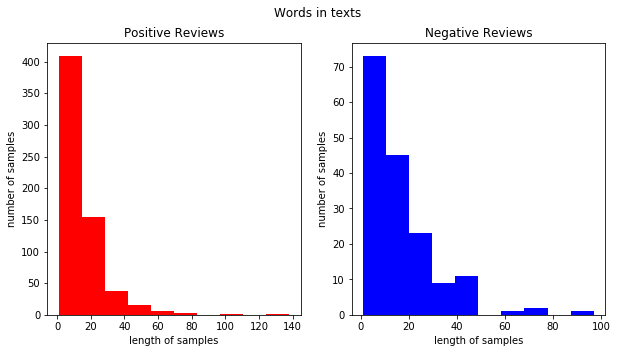

In [33]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = df[df['label']==1]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('긍정 리뷰의 평균 길이 :', np.mean(text_len))

text_len = df[df['label']==0]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('부정 리뷰의 평균 길이 :', np.mean(text_len))
plt.show()

In [34]:
# df.to_csv(f'amazon_review_emotion_{tag_name}_TF-IDF_211021.csv' , encoding='utf-8-sig' , index = False)

In [187]:
words_list = ['top50_neg_word' , 'top50_pos_word']
tfidf_ = []

for w in words_list:

    docs = []

    neg_review_string = ",".join(df[df['label'] == 0]['review'].values.tolist())
    pos_review_string = ",".join(df[df['label'] == 1]['review'].values.tolist())

    docs.append(neg_review_string)
    docs.append(pos_review_string)

    vocab = eval(w)
    vocab.sort()
    
    N = len(docs) # 총 문서의 수

    def tf(t, d):
        return d.count(t)

    def idf(t):
        df = 0
        for doc in docs:
            df += t in doc
        return abs(math.log(N/(df + 1)))

    def tfidf(t, d):
        return tf(t,d)* idf(t)
    
    result = []
    for i in range(N):
        result.append([])
        d = docs[i]
        for j in range(len(vocab)):
            t = vocab[j]

            result[-1].append(tfidf(t,d))
    
    tfidf_.append(pd.DataFrame(result, columns = vocab , index = ['NEG_DOC' , 'POS_DOC']))


In [36]:
now = datetime.now()
today_datetime = now.strftime("%Y%m%d%H%M%S")[2:]
xlxs_dir = f'amazon_review_emotion_{tag_name}_{today_datetime}.xlsx'

with pd.ExcelWriter(xlxs_dir) as writer:

    df.to_excel(writer, sheet_name = 'REVIEW_WORD_COUNT')

    tfidf_[0].T.to_excel(writer, sheet_name = 'NEG_WORD_50_TF-IDF') 
    
    tfidf_[1].T.to_excel(writer, sheet_name = 'POS_WORD_50_TF-IDF') 


In [37]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# corpus = df['review'].values.tolist()
# tfidfv = TfidfVectorizer().fit(top10_neg_word+top10_pos_word)
# print(tfidfv.transform(corpus).toarray())
# print(tfidfv.vocabulary_)

# a = tfidfv.transform(corpus).toarray()

# word_index = tfidfv.vocabulary_

# word_index_sort = dict(sorted(word_index.items(), key = lambda item: item[1]))

# word_index_sort_list = list(word_index_sort.keys())

# word_index_sort_list

# for index, col in enumerate(word_index_sort_list):
#     print(col)
#     print(index)
#     df[col+'_TF-IDF'] = a[:,index].T


In [38]:
df.label.value_counts()

1    630
0    165
Name: label, dtype: int64

In [39]:
df

,id,review_data,name,rating,title,review,verified_purchase,asin.original,asin.variant,date.date,...,difference,got,put,bought,however,disappointed,felt,tone,purchased,thin
0,R3U2M6MV8JBOZR,"Reviewed in the United States on October 11, 2021",Nicole flowerdew,5,Absolutely love,Absolutely love,True,B004RC4S3M,B004RC4S3M,"October 11, 2021",...,0,0,0,0,0,0,0,0,0,0
1,R8VFGCY2KULP9,"Reviewed in the United States on October 10, 2021",Robbie See,5,I love this product,I have tried many different kinds of products ...,True,B004RC4S3M,B004RC4S3M,"October 10, 2021",...,0,0,0,0,0,0,0,0,0,0
2,R3T2HFILJSO7WL,"Reviewed in the United States on October 9, 2021",Tami Mortensen,1,Not what I was expecting at all.,It was almost oily feeling and didnt leave the...,True,B004RC4S3M,B004JRU4YW,"October 9, 2021",...,0,0,0,1,0,0,0,0,0,0
3,R2R93T4E4BY1PD,"Reviewed in the United States on October 8, 2021",Diane,1,Too sheer and does not help redness.,Waste of money Threw in the garbage Way too sh...,True,B004RC4S3M,B004JRU4YW,"October 8, 2021",...,0,0,0,0,0,0,0,0,0,0
4,R2JGGV96MFTZKR,"Reviewed in the United States on October 2, 2021",Kiki C,1,Skip it,Waaaay too small for the price and not really ...,True,B004RC4S3M,B004RC4S3M,"October 2, 2021",...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,R19SW0F8ID3FIZ,"Reviewed in the United States on February 9, 2018",Sandy Soto,5,Great stuff,Great stuff good price Came quickly,True,B004RC4S3M,B004RC4S3M,"February 9, 2018",...,0,0,0,0,0,0,0,0,0,0
875,R2W6UJFJVEIWML,"Reviewed in the United States on February 3, 2018",kassabele,5,I love this primer,I love this primer It goes on super soft and d...,True,B004RC4S3M,B004JRU4YW,"February 3, 2018",...,0,0,0,0,0,0,0,0,0,0
876,R3JVVWU8VX0FYE,"Reviewed in the United States on February 1, 2018",Lola,5,... this primer and have found it to be the be...,I have been using this primer and have found i...,True,B004RC4S3M,B004RC4S3M,"February 1, 2018",...,0,0,0,0,0,0,0,0,0,0
877,R2TNDIYGNVI00K,"Reviewed in the United States on January 31, 2018",Sarah,5,Added to repeat buy list,Goes on so smooth and last all day,True,B004RC4S3M,B004JRU4YW,"January 31, 2018",...,0,0,0,0,0,0,0,0,0,0


In [57]:
docs

['It was almost oily feeling and didnt leave the green base to cover up my redness like I was expecting Not impressed with this at all Ive bought Nyx green in the past for my redness and it was awesome so not sure what happened with this one,Waste of money Threw in the garbage Way too sheer and the green did not work at all,Waaaay too small for the price and not really that good of a primer either,Pretty sure this product is not authentic or its expired The product separates a lot and seems really oily It also does NOTHING for redness,I previously got another green primer from NYX and I loved it It was so creamy and really reduced my redness However the consistency for this primer is off its more matte which is ok I was just surprised in comparison to my last NYX primer and it doesnt reduce my redness as much as my last primer did As for keeping my makeup on which is the goal for most primers I feel like it doesnt do much,Did not mask any redness on my face Its more of a regular primer

In [157]:
all_string = neg_review_string + pos_review_string

In [182]:
def pmi(t, d , all_d, count_of_doc = 2):
    pmi = count_of_w(t,d) / ( exist_in_c(t,all_d) / count_of_doc )
#     print(f'count_of_w : {count_of_w(t,d)}')
#     print(f'exist_in_c : {exist_in_c(t,all_d)}' )
#     print(f'count_of_doc : {count_of_doc}')
    return math.log(pmi)

In [183]:
def count_of_w(t,d):
    cnt = 0
    cnt += d.count(t)
    return cnt
    

In [184]:
def exist_in_c(t,all_d):
    res = 0
    for review_str in all_d:
        if t in review_str:
            res +=1
    return res

In [185]:
pmi('good' , docs[0] , docs)

2.9444389791664403

In [198]:
top10_neg_word

['redness',
 'cover',
 'doesnt',
 'nothing',
 'green',
 'red',
 'oily',
 'didnt',
 'money',
 'work']

In [214]:
neg = []
pos = []
df = pd.DataFrame(index = top10_neg_word)
for i in top10_neg_word:
    res_neg = pmi(i, docs[0] , docs)
    res_pos = pmi(i, docs[1] , docs)
    neg.append(res_neg)    
    pos.append(res_pos)
df['NEG_DOC'] = neg
df['POS_DOC'] = pos
    

In [215]:
df

,NEG_DOC,POS_DOC
redness,3.912023,3.367296
cover,3.663562,3.367296
doesnt,2.995732,3.367296
nothing,3.044522,1.386294
green,3.091042,2.890372
red,4.634729,4.143135
oily,3.091042,3.806662
didnt,2.833213,2.772589
money,2.995732,1.609438
work,3.218876,4.343805


In [199]:
docs

['It was almost oily feeling and didnt leave the green base to cover up my redness like I was expecting Not impressed with this at all Ive bought Nyx green in the past for my redness and it was awesome so not sure what happened with this one,Waste of money Threw in the garbage Way too sheer and the green did not work at all,Waaaay too small for the price and not really that good of a primer either,Pretty sure this product is not authentic or its expired The product separates a lot and seems really oily It also does NOTHING for redness,I previously got another green primer from NYX and I loved it It was so creamy and really reduced my redness However the consistency for this primer is off its more matte which is ok I was just surprised in comparison to my last NYX primer and it doesnt reduce my redness as much as my last primer did As for keeping my makeup on which is the goal for most primers I feel like it doesnt do much,Did not mask any redness on my face Its more of a regular primer